# Get started

This notebook gives an overview of [scikit-network](https://scikit-network.readthedocs.io/), a open-source Python package for machine learning on graphs.

## 1. Installation

The easiest way to install ``scikit-network`` is through ``pip``.

In [1]:
# uncomment to install
# !pip install scikit-network

## 2. Data

### Adjacency matrix

Each graph with $n$ nodes is represented by a square adjacency matrix $A$ of size $n \times n$. In its simplest form, the matrix $A$ is binary and we have $A_{ij} =1$ if and only if there is a link from node $i$ to node $j$. If the graph is undirected, the matrix $A$ is symmetric.

In [2]:
import numpy as np

In [3]:
adjacency = np.array([[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 1, 0, 1], [0, 1, 0, 1, 0]])

In [4]:
adjacency

array([[0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0]])

### Sparse matrix

In scikit-network, the adajcency matrix is represented in the [sparse CSR format](https://en.wikipedia.org/wiki/Sparse_matrix) of scipy.

In [5]:
from scipy import sparse

In [6]:
adjacency = sparse.csr_matrix(adjacency)

In [7]:
adjacency

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

### Visualization

Here is the visualization of the above graph.

In [8]:
from IPython.display import SVG
from sknetwork.visualization import svg_graph

In [9]:
# name nodes by indices
n_nodes, _ = adjacency.shape
names = np.arange(n_nodes)

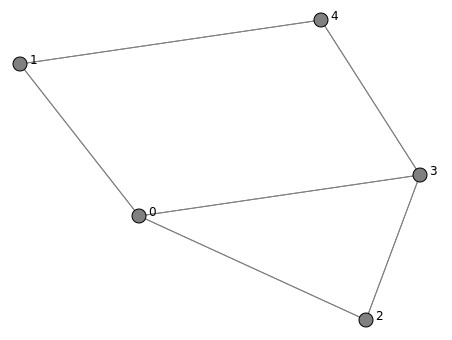

In [10]:
# visualization
SVG(svg_graph(adjacency, names=names))

### Bipartite graphs

Bipartite graphs are special graphs with edges between two sets of nodes. A bipartite graph can be represented by its biadjacency matrix, a rectangular matrix of links between the two sets of nodes.

In [11]:
biadjacency = np.array([[1, 1, 0, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1]])

In [12]:
biadjacency

array([[1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1]])

In [13]:
biadjacency = sparse.csr_matrix(biadjacency)

In [14]:
biadjacency

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [15]:
from sknetwork.visualization import svg_bigraph

In [16]:
# name nodes by indices
n_row, n_col = biadjacency.shape
names_row = np.arange(n_row)
names_col = np.arange(n_col)

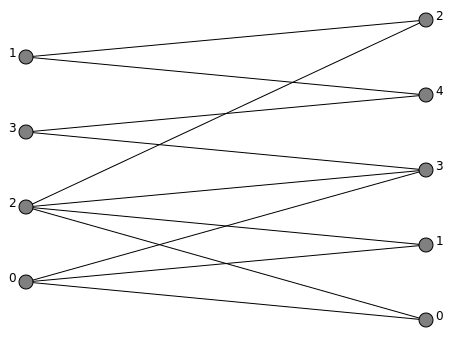

In [17]:
# visualization
SVG(svg_bigraph(biadjacency, names_row=names_row, names_col=names_col))

### Weighted graphs

Weights on edges can be represented by an adjacency matrix with non-negative entries (or a biadjacency matrix for a bipartite graph).

In [ ]:
adjacency = np.array([[0, 2, 1, 3, 0], [2, 0, 0, 0, 3], [1, 0, 0, 2, 0], [3, 0, 2, 0, 1], [0, 3, 0, 1, 0]])

In [ ]:
adjacency

In [ ]:
adjacency = sparse.csr_matrix(adjacency)

In [ ]:
# visualization
SVG(svg_graph(adjacency, names=names))

### Subgraphs

Subgraphs can easily be obtained by slicing the adjacency matrix.

In [ ]:
index = [0, 2, 3, 4]
sub_adjacency = adjacency[index][:, index]

In [ ]:
# visualization
SVG(svg_graph(sub_adjacency, names=names[index]))

## 3. Algorithms

### Basic tools

Some basic tools for loading, processing and visualizing graphs are available as functions.

|Module|Description|Functions|
|:---|:---|:---|
|Data|Loading and saving graphs|``from_cs``, ``save``, ``load``, ``load_netset``, ... |
|Topology|Connectivity and structure|``get_connected_components``, ``is_acyclic``, ...|
|Path|Shortest paths and distances|``get_distances``, ``get_shortest_path``, ...|
|Linear algebra|Matrix operations|``normalize``, ``diagonal_pseudo_inverse``, ...|
|Utils|Useful tools|``directed2undirected``, ``get_degrees``, ``get_neighbors``, ...|
|Visualization|Visualization tools|``svg_graph``, ``svg_bigraphs``, ...|

In [ ]:
from sknetwork.data import karate_club
from sknetwork.utils import get_degrees

In [ ]:
adjacency = karate_club()

In [ ]:
get_degrees(adjacency)

### Machine learning

The main algorithms of scikit-network are useful for machine learning on graphs.

Each algorithm is available as an object with some methods among:

* ``fit``: fit the algorithm to the graph. This method is mandatory.
* ``predict``: predict the output (e.g., labels of nodes).
* ``predict_proba``: predict the output with probability (e.g., probability distribution over labels).
* ``transform``: transform the graph.
* ``fit_predict``: apply fit + predict.
* ``fit_predict_proba``: apply fit + predict_proba.
* ``fit_transform``: apply fit + transform.


The output is an attribute of the object with an underscore (e.g., ``labels_``).

|Module|Description|Algorithms|Output|
|:---|:---|:---|:---|
|Clustering|Form clusters of nodes|``Louvain``, ``PropagationClustering``|``labels_``|
|Classification|Classify nodes|``DiffusionClassifier``,  ``NNClassifier``, ...|``labels_``|
|GNN|Graph neural networks|``GNNClassifier``|``labels_``|
|Regression|Assign values to nodes|``Diffusion``,  ``Dirichlet``|``values_``|
|Hierarchy|Get a hierarchical representation of  nodes|``Paris``, ``LouvainHierarchy``|``dendrogram_``|
|Embedding|Get a vectorial representation of nodes|``Spectral``, ``SVD``, ``LouvainEmbedding``, ...|``embedding_``|
|Ranking|Give importance scores to nodes|``PageRank``, ``Katz``, ``Betweenness``, ...|``scores_``|
|Link prediction|Predict links between nodes|``NNLinker``|``links_``|

In [ ]:
from sknetwork.data import karate_club
from sknetwork.classification import DiffusionClassifier

In [ ]:
dataset = karate_club(metadata=True)
adjacency = dataset.adjacency
position = dataset.position
labels = dataset.labels

In [ ]:
classifier = DiffusionClassifier()
classifier.fit(adjacency, {node: labels[node] for node in [0, 1, 33]})

In [ ]:
labels_pred = classifier.predict()

In [ ]:
SVG(svg_graph(adjacency, position, labels=labels_pred))

In [ ]:
probs = classifier.predict_proba()

In [ ]:
scores = probs[:, 1]

In [ ]:
SVG(svg_graph(adjacency, position, scores=scores))

## 4. Example

We here show how to use scikit-network to cluster a graph, initially stored in a text file as a list of edges.

### Data

In [ ]:
# show first lines
with open('miserables.tsv', 'r') as f:
    data = f.readlines()
    print(''.join(data[:5]))

### Loading

In [ ]:
from sknetwork.data import from_csv

In [ ]:
graph = from_csv('miserables.tsv')

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
adjacency

### Embedding

We here compute a 2D embedding for visualization.

In [ ]:
from sknetwork.embedding import Spring

In [ ]:
algorithm = Spring()

In [ ]:
position = algorithm.fit_transform(adjacency)

In [ ]:
SVG(svg_graph(adjacency, position, names=names))

### Clustering

Finally, we cluster the graph by the Louvain algorithm.

In [ ]:
from sknetwork.clustering import Louvain

In [ ]:
algorithm = Louvain()
labels = algorithm.fit_predict(adjacency)

In [ ]:
SVG(svg_graph(adjacency, position, names=names, labels=labels))
